#Assignment 5: Neural Network Type Classification | TMNIST
Author: Aashay Pawar

NUID: 002134382


##Task

Find a  "Hello World"  Handwritten Digit Classification (MNIST) tutorial and create a similar tutorial for one of the TMNIST data sets.

The tutorial must be posted on Kaggle associated with the data set you use (see https://www.kaggle.com/nikbearbrown/tmnist-alphabet-94-characters/codeLinks to an external site. )   Your notebook MUST not be identical to the other notebooks associated with the data.

1. Nice Notebook https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracyLinks to an external site.

2. The TMNIST data sets TMNIST Alphabet (94 characters), Typography MNIST (TMNIST) with 94 characters and over 281,000 images https://www.kaggle.com/nikbearbrown/tmnist-alphabet-94-characters/Links to an external site.

 

3. TMNIST-Glyphs (MNIST Style Glyph images), Typography MNIST (TMNIST): Over 500000 images of 1812 glyphs in 2990 font styles https://www.kaggle.com/nimishmagre/tmnist-glyphs-1812-charactersLinks to an external site.

 

4. TMNIST (Typeface MNIST), A database of Typeface-based digits https://www.kaggle.com/nimishmagre/tmnist-typeface-mnistLinks to an external site.

 

5. Nice model Notebook https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracyLinks to an external site.

##Grading Rubric

1. 40 % (accuracy) Minus 1 point for every 1% accuracy below 95% for TMNIST (Typeface MNIST) Minus 1 point for every 1% accuracy below 90% for TMNIST Alphabet (94 characters) or TMNIST-Glyphs (MNIST Style Glyph images)

 

2. 10 % (Uniqueness) Up to 10 points may be deducted if your notebook looks too similar to the other notebooks posted (i.e. You will get 10 points if it looks like you wrote it and didn't copy it)

 

3. 50 % (Explanation) How well did you explain the math, code, and ideas behind your neural network?

#About the Dataset

Typography MNIST (TMNIST)

MNIST style images of the following 94 alphabetic characters:

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\', ']', '^', '_', '`', '{', '|', '}', '~'}

This repository contains a single csv .file.
The structure of the csv file is:

the first row contains column headers ['names', 'labels','1','2',…..'784']
The 'names' column contains font file names such as 'Acme-Regular' and 'ZillaSlab-Bold'
The 'labels' column contains characters such as '@','E' or '+'
The remaining 784 columns contain the grayscale pixel values for the image of the corresponding character in the 'name' font-style
This dataset contains over 281,000 images and is part of the Warhol.ai Computational Creativity and Cognitive Type projects.

Kaggle: https://www.kaggle.com/datasets/nikbearbrown/tmnist-alphabet-94-characters

# Abstract
In the task "Neural Network Type Classification | TMNIST", we will work together to create a "Hello World" handwritten digit classification tutorial using one of the TMNIST datasets. We will begin by selecting a suitable TMNIST dataset and then explore the dataset to gain insights into its properties. Next, we will preprocess the data to prepare it for training a neural network. We will then proceed to create a neural network model using a popular deep learning framework such as TensorFlow or PyTorch. After training the model, we will evaluate its performance on a separate test set to assess its accuracy. Finally, we will use the model to make predictions on new, unseen data. Throughout the tutorial, we will explain the various steps and concepts involved in building a neural network for classification and provide tips on best practices. By the end of the tutorial, you should have a good understanding of how to build and train a neural network for classification tasks using a TMNIST dataset.






#Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import re

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf 
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading Data

The dataset is uploaded on my personal google drive in a folder named 'DSEM'. The below steps are how we can load data from the drive.

## Mounting Google Drive
This code snippet is used to mount Google Drive on a Google Colab notebook. Google Drive is a cloud storage service provided by Google that allows users to store and share files and folders online.

When this code is executed, it will prompt the user to authorize access to their Google Drive account by following a link and entering an authorization code. Once the authorization is granted, the user's Google Drive will be mounted at the "/content/drive" directory in the Colab environment. This allows the user to read and write files to their Google Drive directly from the Colab notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


##Specifying path to dataset
In this code snippet, a CSV file named "94_character_TMNIST.csv" is read into a pandas dataframe using the pandas "read_csv" function. The path to the file is specified as "/content/drive/MyDrive/DSEM/94_character_TMNIST.csv".

In [3]:
path = '/content/drive/MyDrive/DSEM/94_character_TMNIST.csv'
df = pd.read_csv(path)

##Reading data

In [4]:
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274093 entries, 0 to 274092
Columns: 786 entries, names to 784
dtypes: float64(784), object(2)
memory usage: 1.6+ GB


1. The number of rows and columns in the dataframe: In this case, there are 274,093 rows and 786 columns.

2. The column names: The dataframe has 786 columns named "names", 0, 1, 2, ..., 783.

3. The data types of each column: In this case, there are two data types - "float64" for 784 columns and "object" for 2 columns.

4. The amount of memory used by the dataframe: In this case, the memory usage is reported as 1.6+ GB, which indicates that the dataframe is quite large and may require significant resources to work with.



In [6]:
df.isnull().sum()

names     0
labels    0
1         0
2         0
3         0
         ..
780       0
781       0
782       0
783       0
784       0
Length: 786, dtype: int64

None of the columns has missing values.

# Cleaning Data
The code below cleans a pandas dataframe by removing null values and groups labels into four categories: lowercase letters, uppercase letters, numbers, and symbols, using regular expressions. The resulting groups are stored in separate lists, and a new column called "group" is added to the dataframe to assign a group number to each label based on its category.

In [7]:
# Clean the dataset by removing null values and grouping all labels
df.dropna(inplace=True)
all_ = list(df['labels'].unique())
pattern_uc = re.compile(r"[A-Z]")
pattern_lc = re.compile(r"[a-z]")
pattern_numbers = re.compile(r"[0-9]")
pattern_symbols = re.compile(r"[\W]|[\_\,]")
lower_case = pattern_lc.findall(str(all_))
Upper_case = pattern_uc.findall(str(all_))
Numbers_ = pattern_numbers.findall(str(all_))
Symbols_ = list(set(pattern_symbols.findall(str(all_))))
Symbols_.pop(27)
group = 1
for list_ in (lower_case, Upper_case, Numbers_, Symbols_):
    df.loc[df['labels'].isin(list_), 'group'] = str(group)
    group += 1

# Separate the features and labels

In this code snippet, two variables 'X' and 'y' are created from a pandas dataframe 'df' containing data and labels.

The first line of code selects all rows in the 'df' dataframe and all columns from the third column ('iloc[:, 2:]') up to the second to last column ('-1'), and assigns this subset of the dataframe to the variable 'X'. The ".astype('float32')" method is called to convert the data in 'X' to 32-bit floating point format, which is a common format for numerical data in machine learning.

The second line of code creates a new dataframe called 'y' by selecting only the 'labels' column from the original dataframe 'df'. The double brackets are used to select the 'labels' column as a dataframe instead of a series.

Overall, this code is used to separate the features (data) and labels (target variable) into two variables 'X' and 'y', respectively, which can be used in a machine learning model.

In [8]:
X = df.iloc[:, 2:-1].astype('float32') 
y  = df[['labels']]

# Create dictionary for label mapping
This code is used to create a dictionary that maps each label in 'y' to a unique numerical value, which is required to feed the labels to a machine learning model.

In [9]:
#preping the data to create dictionary
labels = y['labels'].unique()
values = [num for num in range(len(df['labels'].unique()))]
label_dict= dict(zip(labels, values))
label_dict_inv = dict(zip(values, labels))
y['labels'].replace(label_dict, inplace=True)

In [10]:
#Checking the mappings
print(label_dict)

{'6': 0, 'D': 1, 'f': 2, '/': 3, 'F': 4, 'x': 5, 'J': 6, '8': 7, 'H': 8, 'k': 9, '@': 10, '1': 11, '=': 12, 'g': 13, ')': 14, '2': 15, 'd': 16, '^': 17, '3': 18, 't': 19, '#': 20, '.': 21, '4': 22, 'o': 23, '"': 24, 'y': 25, 'A': 26, 'u': 27, 'G': 28, '-': 29, 'm': 30, 'W': 31, '&': 32, 'c': 33, '9': 34, 'N': 35, ']': 36, 'P': 37, 'X': 38, '|': 39, '}': 40, 'h': 41, '7': 42, 'j': 43, '5': 44, '>': 45, '?': 46, 'b': 47, '*': 48, 'w': 49, 'l': 50, '0': 51, '$': 52, 'I': 53, 'Y': 54, '%': 55, ':': 56, 'T': 57, 'K': 58, 'E': 59, '<': 60, 'V': 61, '{': 62, 'M': 63, 'S': 64, 'a': 65, 'i': 66, 'r': 67, "'": 68, 'p': 69, ';': 70, '[': 71, '+': 72, 'e': 73, 'U': 74, '(': 75, 's': 76, '~': 77, ',': 78, 'C': 79, 'q': 80, '_': 81, 'n': 82, 'B': 83, 'z': 84, 'v': 85, 'O': 86, 'R': 87, '`': 88, 'Z': 89, 'Q': 90, 'L': 91, '!': 92, '\\': 93}


# Creating Training and Test Sets
This code snippet creates a randomized 80-20 split of the dataset into training and testing sets, and assigns the resulting subsets to four variables, X_train, X_test, y_train, and y_test, which can be used for further model training, evaluation, and analysis.

In [11]:
# creating test train split of 80% and 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

This code snippet is preparing the data for a deep learning model by reshaping the input data and converting the target variable to categorical format.

1. First, the Length and Height variables are set to 28, which represents the dimensions of the image data.

2. Next, the number of classes NCl is determined by finding the number of unique classes in the y_train target variable using the nunique method.

3. The reshape method from the NumPy library is used to reshape the X_train and X_test data from a 2D matrix to a 4D tensor. The new shape is specified as (X_train.shape[0], Length, Height, 1), where X_train.shape[0] is the number of samples in the training set. This reshaping operation is necessary to prepare the data for a convolutional neural network (CNN) model, which takes in 4D tensors as input.

4. The to_categorical function from the Keras library is used to convert the y_train and y_test target variables to categorical format. This function converts the class vector (integer values) to binary class matrix representation, which is necessary for training a multi-class classification model.

5. Finally, the code prints the shapes of the X_train, X_test, y_train, and y_test arrays to confirm that the data has been correctly reshaped and converted to categorical format.

In [12]:
# Reshape the inputs
Length, Height = 28, 28
NCl = y_train.nunique()[0]
X_train = np.reshape(X_train.values, (X_train.shape[0] , Length, Height, 1))
X_test = np.reshape(X_test.values, (X_test.shape[0] , Length, Height, 1))
y_train = to_categorical(y_train, NCl, dtype='int')
y_test = to_categorical(y_test, NCl, dtype='int')

print(f'X:Train, Test data shape:{X_train.shape},{X_test.shape}')
print(f'Y:Train, Test data shape:{y_train.shape},{y_test.shape}')

X:Train, Test data shape:(219274, 28, 28, 1),(54819, 28, 28, 1)
Y:Train, Test data shape:(219274, 94),(54819, 94)


The output of the code indicates the shape of the X_train, X_test, y_train, and y_test arrays after the reshaping and conversion to categorical format.

1. The X_train and X_test arrays have a shape of (219274, 28, 28, 1) and (54819, 28, 28, 1) respectively. The first dimension represents the number of samples, the second and third dimensions represent the height and width of the image (28 pixels each), and the last dimension represents the number of color channels, which is set to 1 in this case because the images are grayscale.

2. The y_train and y_test arrays have a shape of (219274, 94) and (54819, 94) respectively. The first dimension represents the number of samples, and the second dimension represents the number of classes (94 in this case). The to_categorical function has converted the integer class labels into binary class matrices, where each row represents a sample, and each column represents a class. The value in each cell of the matrix is either 0 or 1, indicating whether the sample belongs to that class or not.

# Samples from Dataset
This code is a simple way to visualize a sample of the characters in the dataset to get an idea of what the characters look like.

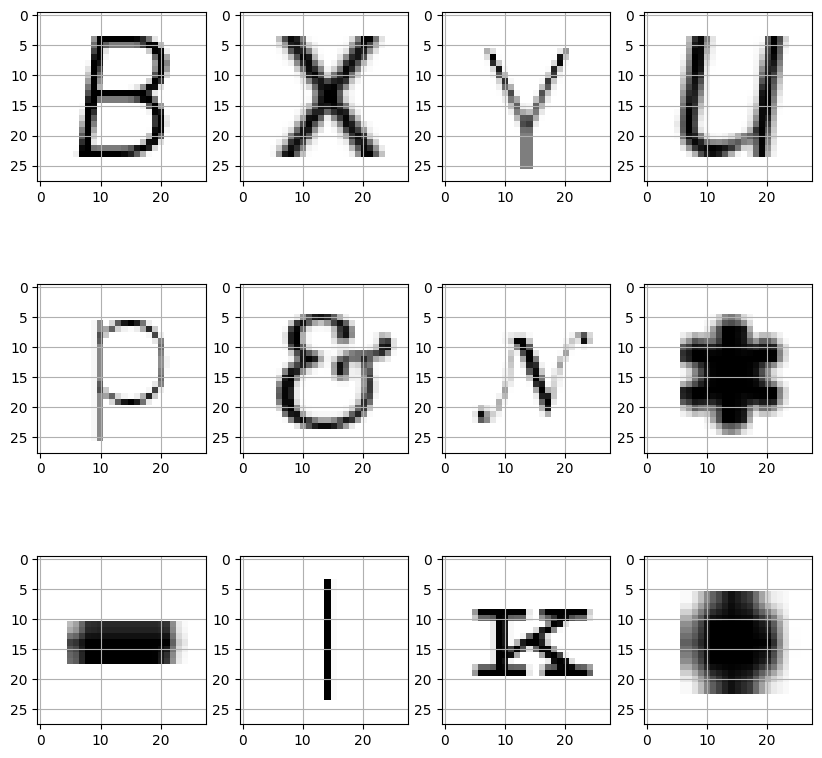

In [13]:
# Display a sample of characters from the dataset
random = shuffle(X_train[:500])
fig, ax = plt.subplots(3, 4, figsize=(10, 10)) 
axes = ax.flatten()
for i in range(12):
    img = np.reshape(random[i], (28, 28))
    axes[i].imshow(img, cmap="Greys")
    img_final = np.reshape(img, (1, 28, 28, 1))
    axes[i].grid()

1. It first selects the first 500 samples from the training set using slicing and shuffles them randomly using the shuffle function from the sklearn.utils module.

2. It then creates a 3x4 grid of subplots using plt.subplots() function from the matplotlib.pyplot module and flattens the array of axes objects using the flatten() method.

3. It then loops through the 12 subplots and for each subplot, it reshapes the image data to a 2D array using NumPy's reshape function, sets the color map to grayscale using the cmap parameter of the imshow() method, and displays the image using the imshow() method. It then reshapes the image again into a 4D tensor with shape (1, 28, 28, 1) to make it compatible with the input shape required by the convolutional neural network model. Finally, it adds gridlines to the image using the grid() method.

# Importing libraries for building Neural Networks

The below code imports several classes and functions from the Keras API of the TensorFlow library, which are used for building a neural network:

1. Sequential is a class that allows you to create a linear stack of layers in a neural network. Each layer in the model is added using the add() method of the Sequential object.

2. Dense is a class that implements a fully connected layer in a neural network. It is the most common layer type used in deep learning models.

3. Conv2D is a class that implements a 2D convolutional layer in a neural network. It is used for image processing tasks.

4. MaxPool2D is a class that implements a 2D max pooling layer in a neural network. It is used to reduce the spatial dimensions of the feature maps.

5. Flatten is a class that flattens the input tensor into a 1D array. It is typically used to connect the convolutional layers to the fully connected layers in the neural network.

6. Dropout is a class that randomly drops out a certain percentage of the input units during training to prevent overfitting.

7. BatchNormalization is a class that normalizes the inputs to a layer in a neural network to improve the performance of the model.

8. Activation is a class that applies an activation function to the output of a layer in a neural network.

9. SGD, Adam, and RMSprop are classes that implement different optimization algorithms for training neural networks.

10. EarlyStopping is a callback function that stops the training process early if the validation loss stops improving, which can help prevent overfitting.

In [14]:
# importing libraries for building neural netwrok
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten,Dropout,BatchNormalization, Activation
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

# Building the CNN Architecture
This code defines the architecture of a convolutional neural network for image classification. The model consists of several convolutional layers, max pooling layers, and dropout layers. The final layers are fully connected layers with softmax activation to output class probabilities. The model is designed to take in input images of size 28x28 and output class predictions for a given number of classes.

In [15]:
# Define the model architecture
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(Length, Height, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(units=NCl))
model.add(Activation('softmax'))

The code below compiles the neural network model with the specified settings. The loss function used is categorical cross-entropy, which is a commonly used loss function for multiclass classification problems. The optimizer used is Adam, which is an adaptive learning rate optimization algorithm. The learning rate is set to 0.001. The metrics to be evaluated during training and testing are accuracy, which is the fraction of correctly classified images.

In [16]:
#Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Training the model

This code is training the defined model using the compiled settings. It is using the fit method of the model object to train on the training dataset (X_train and y_train) with a batch size of 128, for 10 epochs. It is also validating the model's performance on the test dataset (X_test and y_test).

Additionally, it is using EarlyStopping callback to stop the training early if the validation accuracy does not improve for 10 consecutive epochs, thus preventing overfitting.

The history variable is storing the training and validation accuracy and loss values for each epoch.

In [18]:
#Training
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='auto')
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/10
1714/1714 [==============================] - 1237s 721ms/step - loss: 0.4824 - accuracy: 0.8567 - val_loss: 0.2581 - val_accuracy: 0.9214
Epoch 2/10
1714/1714 [==============================] - 1295s 756ms/step - loss: 0.2912 - accuracy: 0.9076 - val_loss: 0.2261 - val_accuracy: 0.9273
Epoch 3/10
1714/1714 [==============================] - 1224s 714ms/step - loss: 0.2529 - accuracy: 0.9186 - val_loss: 0.2087 - val_accuracy: 0.9306
Epoch 4/10
1714/1714 [==============================] - 1224s 714ms/step - loss: 0.2331 - accuracy: 0.9244 - val_loss: 0.1944 - val_accuracy: 0.9380
Epoch 5/10
1714/1714 [==============================] - 1257s 734ms/step - loss: 0.2169 - accuracy: 0.9280 - val_loss: 0.2045 - val_accuracy: 0.9335
Epoch 6/10
1714/1714 [==============================] - 1225s 715ms/step - loss: 0.2054 - accuracy: 0.9309 - val_loss: 0.1896 - val_accuracy: 0.9351
Epoch 7/10
1714/1714 [==============================] - 1225s 714ms/step - loss: 0.1933 - accuracy: 0.9345

# Evaluating the model
This code evaluates the trained neural network model's accuracy on the test dataset. It calls the evaluate method of the model object and passes X_test and y_test as input arguments.

The method returns the loss value and accuracy of the model on the test data, which are then printed to the console using the print function. The test loss is formatted to two decimal places and the test accuracy is formatted as a percentage.

In [19]:
#Evaluating model accuracy on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test loss: {:.2f}".format(test_loss))
print("Test accuracy: {:.2f}%".format(test_accuracy * 100))

1714/1714 [==============================] - 77s 45ms/step - loss: 0.1581 - accuracy: 0.9486
Test loss: 0.16
Test accuracy: 94.86%


# Visualizing the model performance
This code is plotting the training and validation accuracy as well as the training and validation loss for each epoch during the training process. It uses the history object returned by the model.fit() method to access these values. The plt.plot() function is used to plot the values and the plt.legend() function is used to create a legend for the plot. Finally, the plt.show() function is called to display the plot.

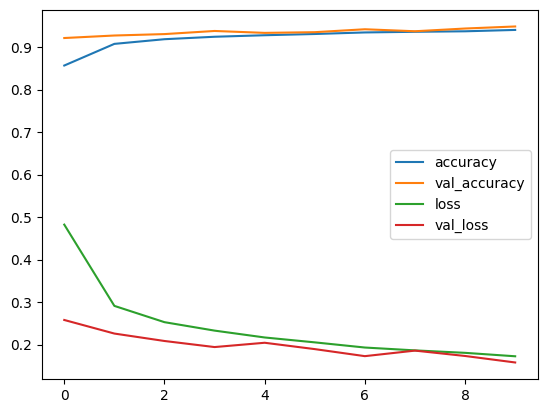

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

From the about graph output, we can observe that the model accuracy increased and loss decreased over time.

# Final Prediction

1/1 [==============================] - 0s 28ms/step


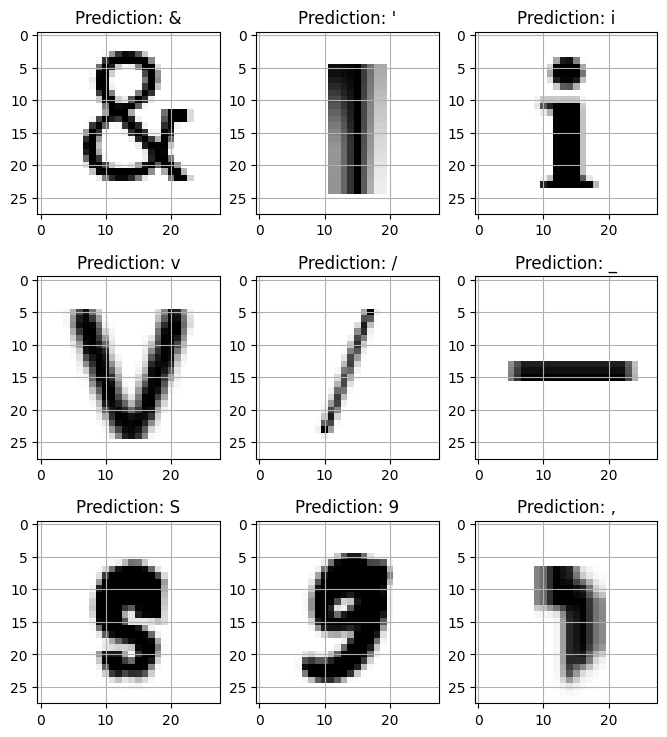

In [21]:
#predicting the charecters using trained model
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(X_test[i], (28,28)) # reshaping it for displaying
    ax.imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction
    pred = label_dict_inv[np.argmax(model.predict(img_final))]
    ax.set_title("Prediction: "+pred)
    ax.grid()

# Conclusion
1. The model performed good and was able to predict with 100% accuracy (9 out of 9 predictions are correct)
2. The accuracy on test test is 94.86% which is pretty decent for a simple CNN

# References

1. https://www.kaggle.com/nikbearbrown/tmnist-alphabet-94-characters/code
2. https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracy
3. https://www.kaggle.com/nikbearbrown/tmnist-alphabet-94-characters
4. https://www.kaggle.com/nimishmagre/tmnist-glyphs-1812-characters
5. https://www.kaggle.com/nimishmagre/tmnist-typeface-mnist
6. https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracy

# License

MIT License

Copyright (c) 2023 Aashay Pawar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.